In [1]:
%matplotlib inline

In [85]:
np.random.seed(2)


n = 1000
b1, b2, c1 = 0.5, 0.5, -0.1

X = np.random.multivariate_normal([0, 0], [[1, 0.5],[0.5, 1]], size=n)

r = 1/np.exp(b1*X[:, 0] + b2 * X[:, 1]**2 + c1 * X[:, 1])

T_actual = np.random.exponential(scale=r)
T_censor = np.random.exponential(scale=4*r)
T = np.minimum(T_actual, T_censor)
E = T_actual < T_censor



In [86]:
from lifelines import CoxPHFitter
import statsmodels.api as sm

df = pd.DataFrame({'T':T, 'x1': X[:, 0], 'E': E})
cph = CoxPHFitter().fit(df, 'T', 'E')
martingale_residuals = cph.compute_residuals(df, 'deviance').sort_index()['deviance'].values



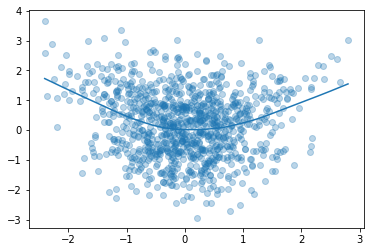

In [87]:
ols = sm.OLS(X[:, 1], sm.add_constant(X[:, 0])).fit()

ols_residuals = ols.resid

ix = np.argsort(ols_residuals)
ols_residuals = ols_residuals[ix]
martingale_residuals = martingale_residuals[ix]

ax = plt.scatter(ols_residuals, martingale_residuals, alpha=0.3)

from lifelines.utils import lowess

ax = plt.plot(ols_residuals, 
         lowess.lowess(ols_residuals, martingale_residuals))


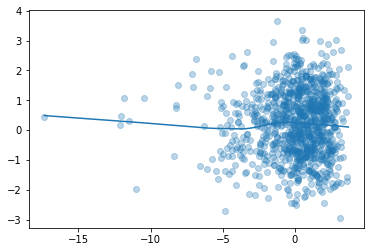

In [90]:

ols = sm.OLS(np.log(X[:, 1]**2), sm.add_constant(X[:, 0])).fit()
ols_residuals = ols.resid
ix = np.argsort(ols_residuals)

ols_residuals = ols_residuals[ix]
martingale_residuals = martingale_residuals[ix]

ax = plt.scatter(ols_residuals, martingale_residuals, alpha=0.3)
ax = plt.plot(ols_residuals, 
         lowess.lowess(ols_residuals, martingale_residuals))
